# Autoencoder with MNIST Dataset

In this notebook, we implement an autoencoder using the custom `NeuronalNet` class.  
The autoencoder is trained on MNIST images to reconstruct the input images.  
After each epoch, reconstructions of some test images are displayed to visualize progress.  
At the end, the training loss over all epochs is also plotted.


In [1]:
# Basic libraries
import numpy as np
import matplotlib.pyplot as plt

# Our custom neural network class
from NNclass import NeuronalNet

# Data preprocessing
from sklearn.preprocessing import MinMaxScaler

# MNIST dataset
from keras.datasets import mnist


## Prepare MNIST Data

We load the MNIST dataset, normalize pixel values to [0,1], 
and reduce the dataset to 2000 training and 10 test images 
to speed up training.

The target values for the autoencoder are identical to the inputs, 
because the goal is to reconstruct the input images.


In [2]:
# Load MNIST dataset
(X_train, _), (X_test, _) = mnist.load_data()

# Use only the first 2000 images for faster training
X_train = X_train[:2000].reshape(-1, 28*28).astype(np.float32)
X_test = X_test[:10].reshape(-1, 28*28).astype(np.float32)

# Normalize to [0,1]
scaler = MinMaxScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Target values = input values (autoencoder)
y_train = X_train
y_test = X_test


## Define Autoencoder Class

We define the `Autoencoder` class, which inherits from `NeuronalNet`.  

- `train` method: Overrides training to learn the input as output.  
- `compute_loss`: Computes the Mean Squared Error (MSE) between input and reconstruction.  
- `fit_with_progress_plot`: Trains the autoencoder over multiple epochs, saves reconstructions of the first test images and the loss, and plots them at the end.


In [3]:
class Autoencoder(NeuronalNet):
    def __init__(self, input_size, hidden_size, learning_rate):
        super().__init__(input_size=input_size, hidden_sizes=hidden_size, output_size=input_size, learning_rate=learning_rate)

    # Target = input itself
    def train(self, inputs, targets=None):
        super().train(inputs, inputs)

    # Compute MSE loss
    def compute_loss(self, inputs):
        reconstructions = np.array([self.feedforward(x).reshape(-1) for x in inputs])
        loss = np.mean((inputs - reconstructions) ** 2)
        return loss

    # Training and visualization
    def fit_with_progress_plot(self, X_train, X_test, epochs=10, num_display=5):
        all_reconstructions = []
        losses = []

        for epoch in range(epochs):
            print(f"Epoch {epoch+1}/{epochs}")
            super().fit(X_train, X_train, 1)  # Train 1 epoch
            
            # Save reconstructions
            recon = [self.feedforward(X_test[i]) for i in range(num_display)]
            all_reconstructions.append(recon)

            # Compute loss
            loss = self.compute_loss(X_train)
            losses.append(loss)
            print(f"Epoch {epoch+1}/{epochs} - Loss: {loss:.6f}")

        # Progress plot of reconstructions
        fig, axes = plt.subplots(num_display, epochs+1, figsize=(2*(epochs+1), 2*num_display))
        for i in range(num_display):
            axes[i, 0].imshow(X_test[i].reshape(28,28), cmap='gray')
            axes[i, 0].axis('off')
            if i == 0:
                axes[i, 0].set_title("Original")
            for epoch in range(epochs):
                axes[i, epoch+1].imshow(all_reconstructions[epoch][i].reshape(28,28), cmap='gray')
                axes[i, epoch+1].axis('off')
                if i == 0:
                    axes[i, epoch+1].set_title(f"Ep {epoch+1}")
        plt.tight_layout()
        plt.show()

        # Loss plot
        plt.figure(figsize=(6,4))
        plt.plot(range(1, epochs+1), losses, marker='o')
        plt.xlabel("Epoch")
        plt.ylabel("MSE Loss")
        plt.title("Training Loss over Epochs")
        plt.grid(True)
        plt.show()


## Initialize and Train Autoencoder

We create an autoencoder object with 5 hidden layers and train it for 20 epochs.  
During training, reconstructions of the first 5 test images are stored and visualized.  
The training loss is also calculated after each epoch and plotted at the end.


Epoch 1/20
Epoch 1/20 - Loss: 0.060908
Epoch 2/20
Epoch 2/20 - Loss: 0.043791
Epoch 3/20
Epoch 3/20 - Loss: 0.036058
Epoch 4/20
Epoch 4/20 - Loss: 0.030844
Epoch 5/20
Epoch 5/20 - Loss: 0.027677
Epoch 6/20
Epoch 6/20 - Loss: 0.025364
Epoch 7/20
Epoch 7/20 - Loss: 0.023619
Epoch 8/20
Epoch 8/20 - Loss: 0.021016
Epoch 9/20
Epoch 9/20 - Loss: 0.019795
Epoch 10/20
Epoch 10/20 - Loss: 0.018713
Epoch 11/20
Epoch 11/20 - Loss: 0.017759
Epoch 12/20
Epoch 12/20 - Loss: 0.016928
Epoch 13/20
Epoch 13/20 - Loss: 0.016165
Epoch 14/20
Epoch 14/20 - Loss: 0.015489
Epoch 15/20
Epoch 15/20 - Loss: 0.014914
Epoch 16/20
Epoch 16/20 - Loss: 0.013138
Epoch 17/20
Epoch 17/20 - Loss: 0.012682
Epoch 18/20
Epoch 18/20 - Loss: 0.012274
Epoch 19/20
Epoch 19/20 - Loss: 0.011897
Epoch 20/20
Epoch 20/20 - Loss: 0.011548


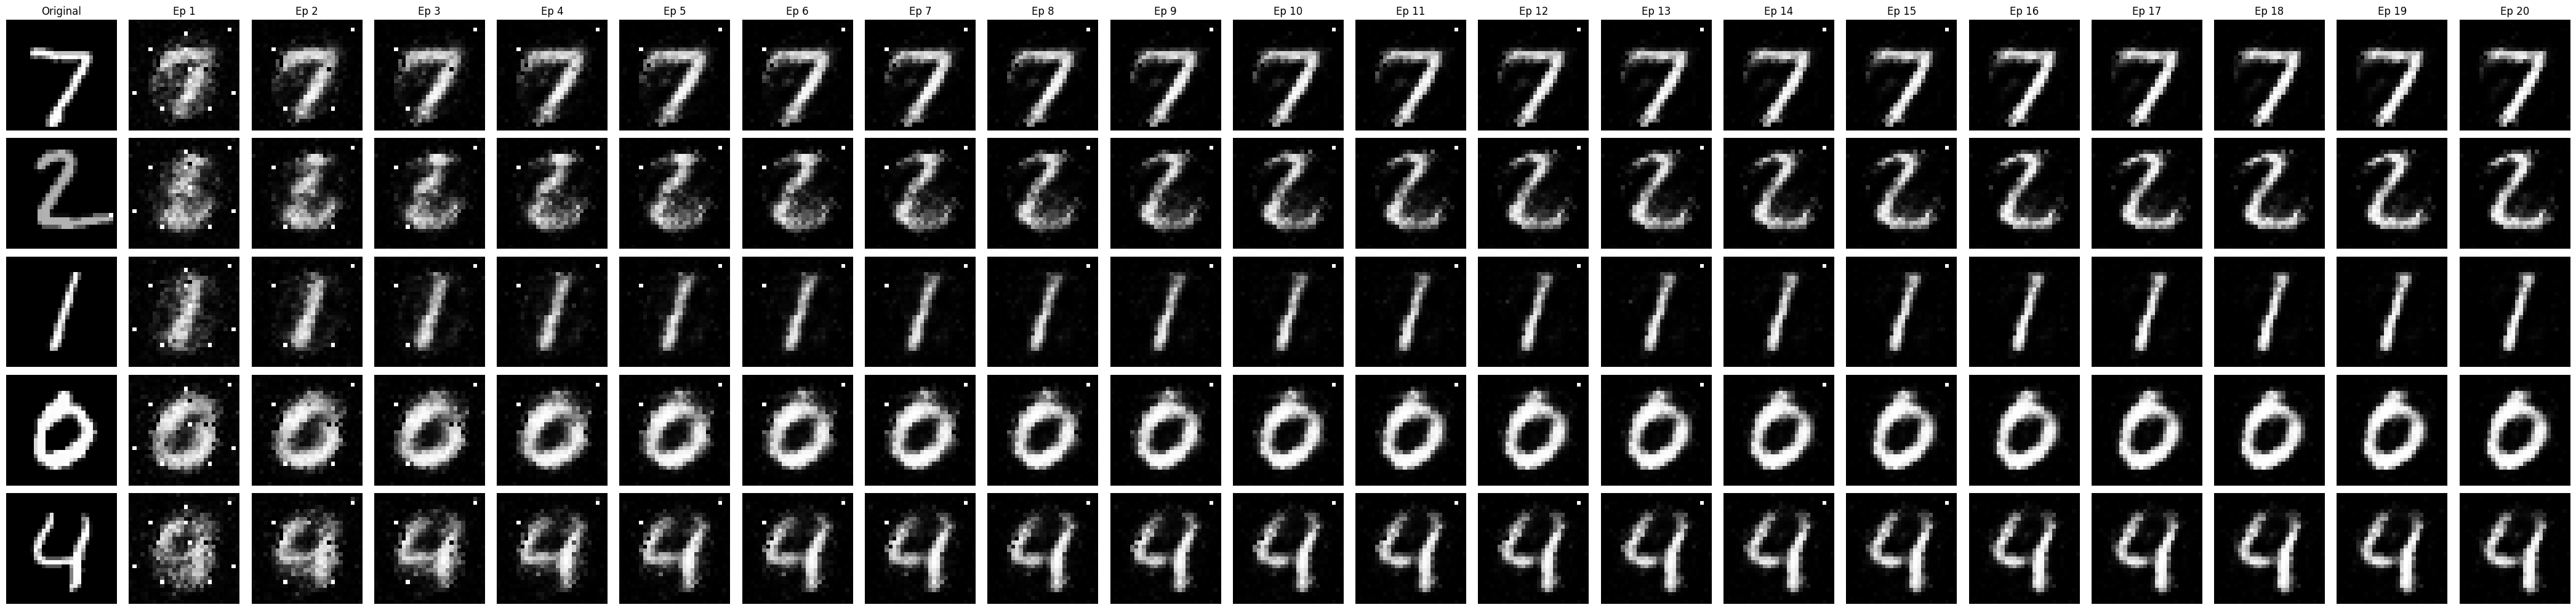

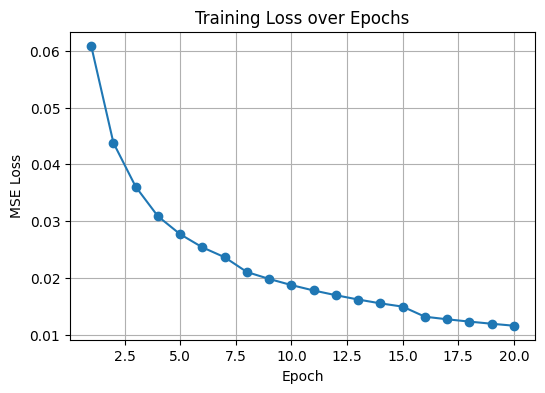

In [4]:
autoencoder = Autoencoder(
    input_size=28*28,
    hidden_size=[512, 256, 128, 256, 512],
    learning_rate=0.01
)

autoencoder.fit_with_progress_plot(X_train, X_test, epochs=20, num_display=5)
